In [1]:
import numpy as np
import pandas as pd

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


check for null values

In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

plot histogram

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

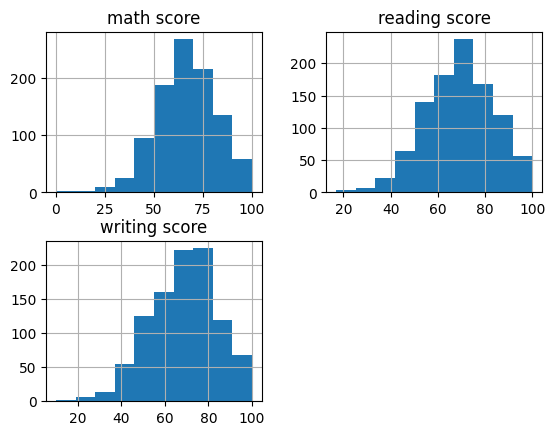

In [4]:
data.hist()

finding co=variance

In [10]:
covariance_matrix = data[['math score', 'reading score', 'writing score']].cov()
covariance_matrix

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [11]:
covariance_matrix.corr()

,math score,reading score,writing score
math score,1.000000,-0.999400,-0.877863
reading score,-0.999400,1.000000,0.893918
writing score,-0.877863,0.893918,1.000000


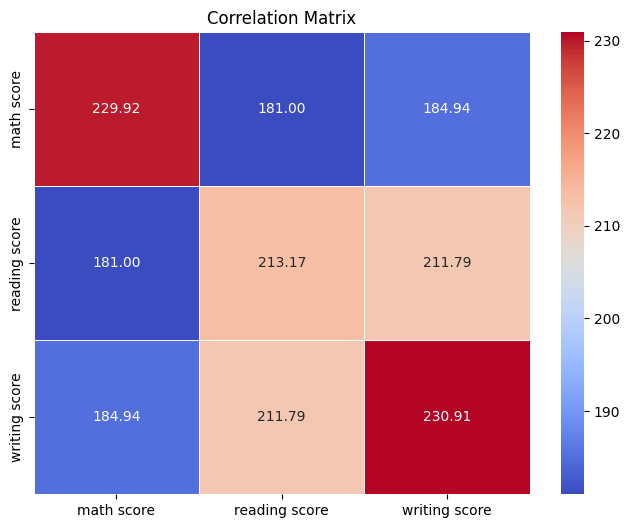

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

visualizing relationship between reading,writing and math scores

<function matplotlib.pyplot.show(close=None, block=None)>

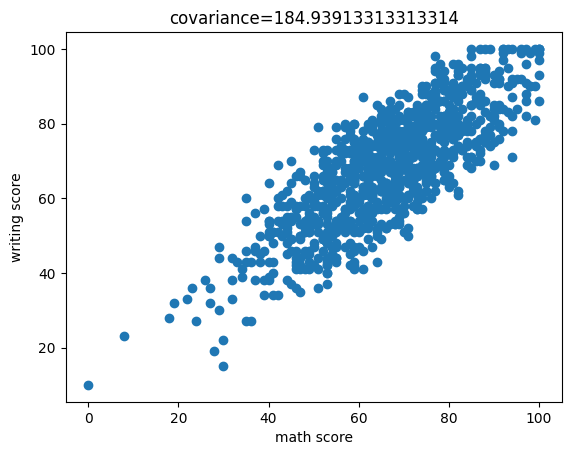

In [16]:
import matplotlib.pyplot as plt
plt.scatter (data['math score'],data['writing score'])
plt.xlabel('math score')
plt.ylabel('writing score')
plt.title('covariance='+str(covariance_matrix['math score']['writing score']))
plt.show

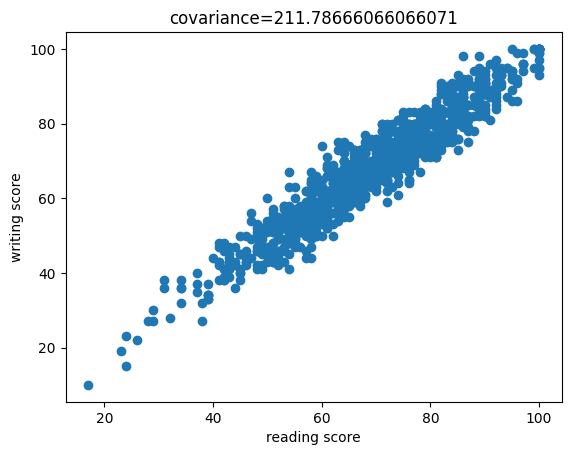

In [17]:
plt.scatter(data['reading score'],data['writing score'])
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.title('covariance='+str(covariance_matrix['reading score']['writing score']))
plt.show()

now selecting reading score as predictor x and writing score as predictor y

In [18]:
x=data['reading score'].values
y=data['writing score'].values

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800,), (200,), (800,), (200,))

In [20]:
m=np.cov(x_train,y_train)[0,1]/x_train.var()
c=y_train.mean()-(x_train.mean()*m)
print(m,c)

0.9995768384222213 -1.1055865676805894


In [21]:
y_pred=(x_train*m)+c

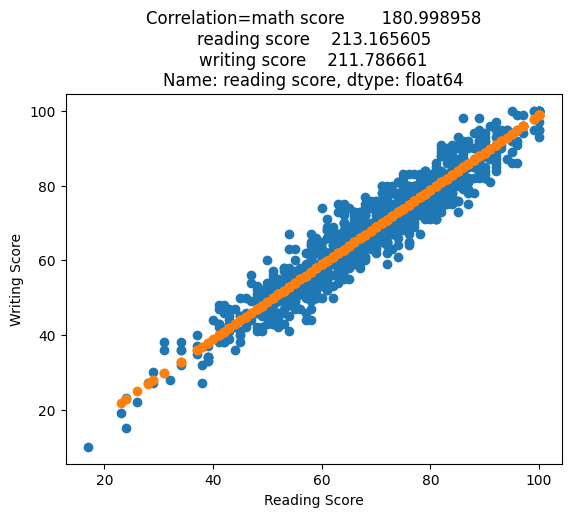

In [23]:
plt.scatter(x,y)
plt.scatter(x_train,y_pred)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Correlation='+str(covariance_matrix['reading score']))
plt.show()

In [24]:
y_pred-y_train

array([  0.86225315,   1.87156271,  -1.14070898,  10.85759838,
        -6.14324795,   2.85590573,  -2.13901633,   0.85632889,
         3.86309948,  -8.1360542 ,  -0.13224575,  -0.13182259,
        -0.13393839,   0.86013734,  -4.14113214,  -0.13520788,
         2.86182999,  -1.13520788,   0.86182999,  -4.13901633,
         4.87791013,  -5.13309207,   2.86140683,   4.86225315,
         0.88214175,  -6.13393839,   4.87833329,  -1.13986266,
         0.86902374,  -1.14790273,  -4.13690052,  -7.13817001,
        -1.13393839,  -0.12335935,   1.86563845,   2.86563845,
        -2.13943949,  -4.14367111,  -0.13266891,   8.86690793,
        -1.12124355,  -3.13182259,  -1.13182259,  -4.13266891,
         1.86902374,   0.86098367,  -5.13859317,   3.87537116,
         8.85378992,  -1.12378252,  -0.13097626,  -0.13859317,
        -5.12335935,  -4.1305531 ,   5.86479212,  -3.13182259,
         1.86987006,  -0.14790273,  -5.14240162,   0.86606161,
         7.87071638,  -4.12716781,   2.86182999,   0.85

prediction for test data

In [25]:
y_pred=(x_test*m)+c
np.sum(np.abs(y_pred-y_test))/(x_test.size)

3.687217521748056

least square method

In [26]:
l=x_train.size
x2=x_train**2
y2=y_train**2
xy=x_train*y_train

In [27]:
m= ((l * sum(xy)) - (sum(x_train)*sum(y_train))) / ((l * sum(x2)) - sum(x_train)**2)
m

0.9983273673741939

In [28]:
c= y_train.mean()-m*x_train.mean()
c

-1.0187373969710052

In [29]:
y_pred=(x_train*m)+c

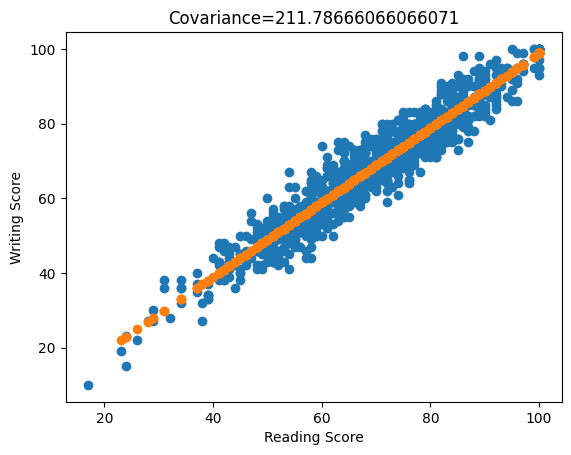

In [30]:
plt.scatter(x,y)
plt.scatter(x_train,y_pred)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Covariance='+str(covariance_matrix['reading score']['writing score']))
plt.show()

In [31]:
np.sum(np.abs(y_pred-y_train))/(x_train.size)

3.596809055060694